In [6]:
# ==========================
# Spectral Embedding
# ==========================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# --- Load and subsample data ---
mnist = fetch_openml("mnist_784", as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
random_state = 42

In [7]:
size = 5000
idx = np.random.choice(len(X), size=size, replace=False)
X_sub, y_sub = X[idx], y[idx]

# --- Scale ---
X_scaled = StandardScaler().fit_transform(X_sub)

In [8]:
# --- Hyperparameter grid ---
r_list = [10, 20, 40, 60, 80, 100]
neighbors_list = [3, 4, 5, 10, 20, 30]

results = []

for r in r_list:
    for n_neighbors in neighbors_list:
        try:
            se = SpectralEmbedding(n_components=r, n_neighbors=n_neighbors, random_state=random_state)
            Z = se.fit_transform(X_scaled)

            # --- Split ---
            Z_tr, Z_ts, y_tr, y_ts = train_test_split(
                Z, y_sub, test_size=0.2, random_state=random_state, stratify=y_sub
            )
            
            clf = LogisticRegression(max_iter=1000, n_jobs=-1)
            clf.fit(Z_tr, y_tr)
            acc = accuracy_score(y_ts, clf.predict(Z_ts))
            results.append((r, n_neighbors, acc))
            print(f"r={r:>3}, n_neighbors={n_neighbors:>2}, Accuracy={acc:.4f}")
        except Exception as e:
            print(f"r={r:>3}, n_neighbors={n_neighbors:>2} -> skipped ({type(e).__name__})")

# --- Find best ---
best = max(results, key=lambda t: t[2])
print(f"\nBest: r={best[0]}, n_neighbors={best[1]}, Accuracy={best[2]:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


r= 10, n_neighbors= 3, Accuracy=0.3100
r= 10, n_neighbors= 4, Accuracy=0.2670
r= 10, n_neighbors= 5, Accuracy=0.2260
r= 10, n_neighbors=10, Accuracy=0.1200
r= 10, n_neighbors=20, Accuracy=0.1200
r= 10, n_neighbors=30, Accuracy=0.1200


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


r= 20, n_neighbors= 3, Accuracy=0.3920
r= 20, n_neighbors= 4, Accuracy=0.4010
r= 20, n_neighbors= 5, Accuracy=0.2570
r= 20, n_neighbors=10, Accuracy=0.1200
r= 20, n_neighbors=20, Accuracy=0.1200
r= 20, n_neighbors=30, Accuracy=0.1200


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


r= 40, n_neighbors= 3, Accuracy=0.5980
r= 40, n_neighbors= 4, Accuracy=0.5190
r= 40, n_neighbors= 5, Accuracy=0.3110
r= 40, n_neighbors=10, Accuracy=0.1240
r= 40, n_neighbors=20, Accuracy=0.1200
r= 40, n_neighbors=30, Accuracy=0.1200


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


r= 60, n_neighbors= 3, Accuracy=0.6870
r= 60, n_neighbors= 4, Accuracy=0.5870
r= 60, n_neighbors= 5, Accuracy=0.3590
r= 60, n_neighbors=10, Accuracy=0.1200
r= 60, n_neighbors=20, Accuracy=0.1200
r= 60, n_neighbors=30, Accuracy=0.1200


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


r= 80, n_neighbors= 3, Accuracy=0.7150
r= 80, n_neighbors= 4, Accuracy=0.5910
r= 80, n_neighbors= 5, Accuracy=0.3800
r= 80, n_neighbors=10, Accuracy=0.1200
r= 80, n_neighbors=20, Accuracy=0.1200
r= 80, n_neighbors=30, Accuracy=0.1200


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


r=100, n_neighbors= 3, Accuracy=0.7390
r=100, n_neighbors= 4, Accuracy=0.6090
r=100, n_neighbors= 5, Accuracy=0.3860
r=100, n_neighbors=10, Accuracy=0.1200
r=100, n_neighbors=20, Accuracy=0.1200
r=100, n_neighbors=30, Accuracy=0.1200

Best: r=100, n_neighbors=3, Accuracy=0.7390


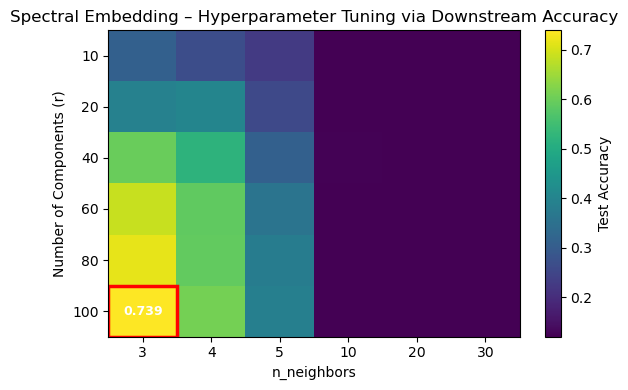

Best performance: r=100, n_neighbors=3, Accuracy=0.7390


In [9]:
# --- Heatmap visualization ---
r_vals = sorted(set(r_list))
n_vals = sorted(set(neighbors_list))
acc_matrix = np.zeros((len(r_vals), len(n_vals)))

for r, n, acc in results:
    acc_matrix[r_vals.index(r), n_vals.index(n)] = acc

best_idx = np.unravel_index(np.argmax(acc_matrix), acc_matrix.shape)
best_r_idx, best_n_idx = best_idx
best_acc = acc_matrix[best_r_idx, best_n_idx]
best_r, best_n = r_vals[best_r_idx], n_vals[best_n_idx]

plt.figure(figsize=(6,4))
plt.imshow(acc_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label="Test Accuracy")
plt.xticks(range(len(n_vals)), n_vals)
plt.yticks(range(len(r_vals)), r_vals)
plt.xlabel("n_neighbors")
plt.ylabel("Number of Components (r)")
plt.title("Spectral Embedding – Hyperparameter Tuning via Downstream Accuracy")

ax = plt.gca()
rect = Rectangle(
    (best_n_idx - 0.5, best_r_idx - 0.5),
    1, 1,
    linewidth=2.5,
    edgecolor='red',
    facecolor='none'
)
ax.add_patch(rect)
plt.text(best_n_idx, best_r_idx, f"{best_acc:.3f}",
         color='white', fontsize=9, ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig("docs/spectral_hyperparam_heatmap.png", dpi=150)
plt.show()

print(f"Best performance: r={best_r}, n_neighbors={best_n}, Accuracy={best_acc:.4f}")

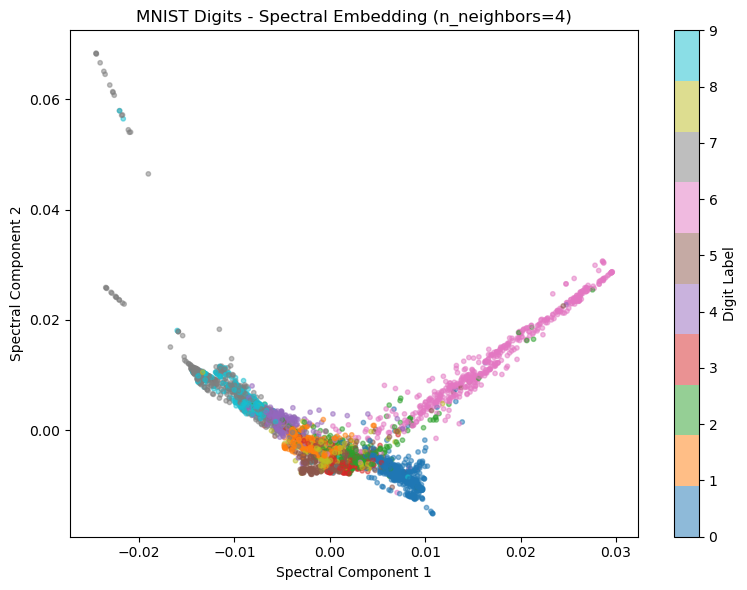

In [14]:
# --- 2D visualization using best n_neighbors ---
n_neighbors = 4
se2 = SpectralEmbedding(n_components=2, n_neighbors=n_neighbors, random_state=random_state)
Z2 = se2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sc = plt.scatter(Z2[:,0], Z2[:,1], c=y_sub, cmap="tab10", s=10, alpha=0.5)
plt.colorbar(sc, label="Digit Label")
plt.xlabel("Spectral Component 1")
plt.ylabel("Spectral Component 2")
plt.title(f"MNIST Digits - Spectral Embedding (n_neighbors={n_neighbors})")
plt.tight_layout()
plt.savefig("docs/spectral12_labeled_2d_tuned.png", dpi=150)
plt.show()